In [1]:
source("src/R/MGGM.R")
dyn.load('lib/c_funcs.so')
library(MASS)

In [2]:
########### generating L true sparse precision and covariance matrices #######
set.seed(19870806) # seed to generate the truth
L <- num_of_matrix <- 4 
### two different underlying matrices ###
L0 <- 2 
p <- dim_of_matrix <-  20
n <- 120 #number of observations for each l
nn <- rep(n,L)
MAX_iter <- 200 #max number of iterations

In [3]:
Gene_cov<-function(p){
    sigma <- runif(p-1,0.5,1)
    covmat0 <- diag(1,p)
    for (i in 1:(p-1)){
        for (j in (i+1):p){
            temp <- exp(-sum(sigma[i:(j-1)]/2))
            covmat0[i,j] <- temp
            covmat0[j,i] <- temp
        }
    }
    return(covmat0)
}
covmat1 <- Gene_cov(p)
covmat_inverse1 <- solve(covmat1)
covmat2 <- Gene_cov(p)
covmat_inverse2 <- solve(covmat2)

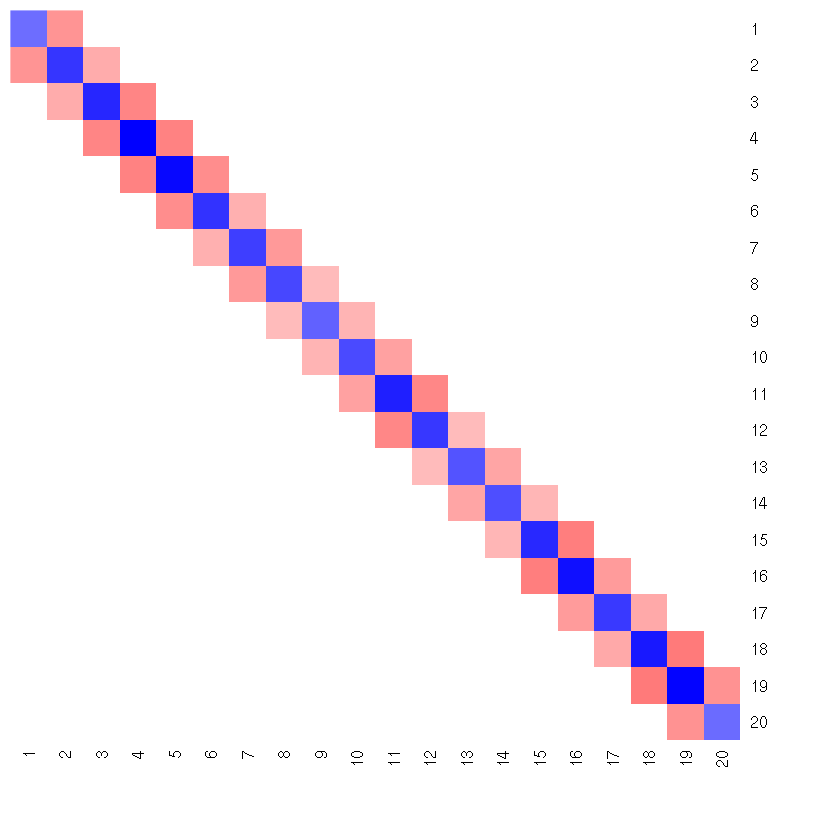

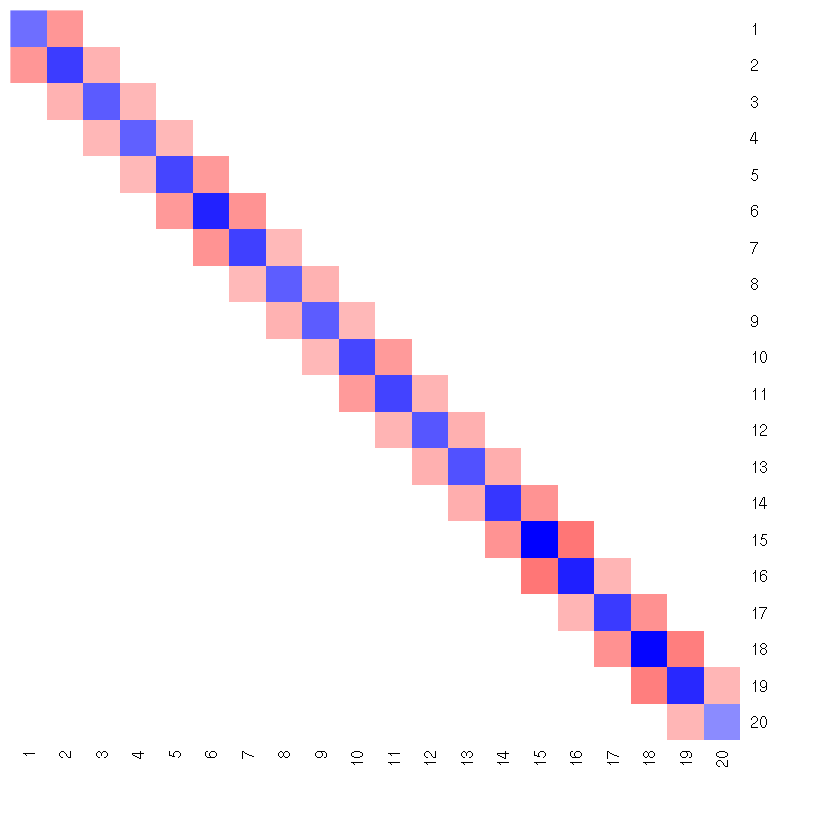

In [14]:
mmge::imshow(covmat_inverse1)
mmge::imshow(covmat_inverse2)

In [4]:
## set first L/2 and last L/2 matrices to be the same
covmat0 <- cbind(matrix(rep(covmat1,L/2),p,p*L/2), matrix(rep(covmat2,L/2),p,p*L/2))
covmat_inverse0 <- cbind(matrix(rep(covmat_inverse1,L/2),p,p*L/2), matrix(rep(covmat_inverse2,L/2),p,p*L/2)) 

In [5]:
######	generating sample covariance matrices S_bar = [S_1, ... S_L]	###########
S_bar <- matrix(0,p,L*p) 
for (l in 1:L){
    temp <- mvrnorm(n = nn[l], rep(0,p), covmat0[,((l-1)*p+1):(l*p)])
    S_bar[,((l-1)*p+1):(l*p)] <- (t(temp) %*% temp) / nn[l]
}

In [6]:
################ matrices generation ends ###############
Lambda1.vec <- log(p)*c(.8, .5, .4, .3, 0.2) #lasso penlaty
Lambda2.vec <- log(p)*c(.1, .08, .06, .05, .04, .03, .0) #grouping penalty
tau <- c(0.01) #thresholding parameter

In [7]:
################# generating graphs ##################
graph_complete = matrix(0,2,L*(L-1)/2)
for (l1 in 1:(L-1)){
  graph_complete[,(L*(l1-1)-(l1-1)*l1/2+1):(L*l1-l1*(l1+1)/2)] = rbind(rep(l1,L-l1),(l1+1):L)
}
graph <- graph_complete - 1

In [8]:
sol_path <- MGGM.path(S_bar, nn, Lambda1.vec, Lambda2.vec, graph, tau)

In [15]:
W_hat = lapply(1:L, function(l1){
    array(sol_path$sol_nonconvex, c(p,p,L,length(Lambda2.vec),length(Lambda1.vec)))[,,l,,]
})

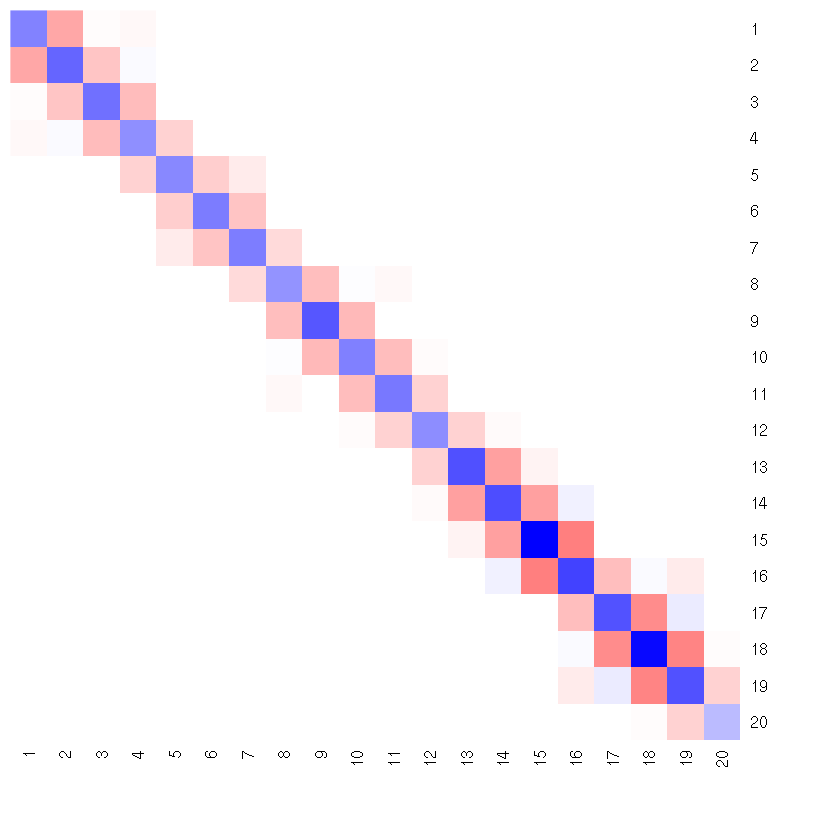

In [16]:
mmge::imshow(W_hat[[1]][,,length(Lambda2.vec),length(Lambda1.vec)])